#  Omdena Liverpool Chapter Predicting RTC Severity - EDA

Code taken from an awesome blog post by Michael P. Notter https://miykael.github.io/blog/2022/advanced_eda/ (with some small changes).  
Thanks Michael 😄

##  1.  Import packages and set up our workspace

In [10]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

### 1.1  Read in files
Read parquet file and render the first five rows

In [11]:
url = ('../../Omdena_Predicting_RTC/DATA/PreProcessed/all_rtc_ds/accident_data_lgbm_impute.parquet')
df_lgbm = pd.read_parquet(url)
# I like to see the dataframe this way because you get to
# see the head and tail and shape of the dataset
df_lgbm

,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
0,200501BS00002,Slight,1.0,450.0,1.0,0.0,3.0,1,1.0,1.0,1,51.520075,1,1,1,524170.0,181650.0,-0.211708,1.0,1,1,0.0,5.0,1,1,1,3.0,30,2,1,1.0,2005,1,0,0,0,1,0,0,1,0
1,200501BS00003,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,4.0,2,51.525301,1,1,1,524520.0,182240.0,-0.206458,2.0,1,2,0.0,0.0,1,1,2,2.0,30,3,1,1.0,2005,1,0,1,0,1,1,0,1,0
2,200501BS00005,Slight,2.0,0.0,1.0,0.0,3.0,3,1.0,4.0,2,51.495752,2,1,1,528060.0,179040.0,-0.156618,3.0,1,1,0.0,0.0,1,2,2,4.0,30,2,1,1.0,2005,1,1,1,0,1,1,0,1,0
3,200501BS00007,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,3,51.512695,1,1,1,524220.0,180830.0,-0.211277,4.0,1,2,0.0,0.0,1,1,2,2.0,30,2,1,1.0,2005,1,0,1,0,1,0,0,1,0
4,200501BS00010,Slight,4.0,3212.0,3.0,304.0,3.0,4,1.0,1.0,1,51.483420,1,1,1,527350.0,177650.0,-0.167342,5.0,2,2,0.0,5.0,1,1,2,4.0,30,2,1,1.0,2005,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037503,201091NM01760,Slight,4.0,95.0,1.0,0.0,4.0,2,1.0,7.0,2,57.374005,5,380,177,311830.0,832450.0,-3.467828,31205.0,2,1,0.0,0.0,44,1,2,5.0,60,4,2,1.0,2010,2,0,1,0,1,1,1,1,0
1037504,201091NM01881,Slight,4.0,95.0,1.0,0.0,4.0,5,1.0,7.0,2,57.232273,4,380,177,290880.0,817170.0,-3.809281,31205.0,1,1,0.0,0.0,44,3,2,6.0,60,3,2,1.0,2010,2,0,1,0,1,1,1,1,0
1037505,201091NM01935,Slight,4.0,96.0,1.0,0.0,3.0,6,1.0,3.0,3,57.585044,5,380,177,288730.0,856520.0,-3.862727,31172.0,1,3,0.0,0.0,44,3,2,4.0,30,1,2,1.0,2010,2,0,1,0,1,0,1,1,0
1037506,201091NM01964,Serious,4.0,9.0,1.0,0.0,3.0,6,1.0,3.0,3,57.214898,4,380,177,289940.0,815260.0,-3.823997,31205.0,1,2,0.0,0.0,44,2,2,4.0,60,2,2,1.0,2010,2,0,1,0,1,0,1,1,0


##  2.  Structure Investigation
### 2.1 Size, Shape and Type

Lets check the shape of our data

In [12]:
df_lgbm.shape

(1037508, 41)

We have **1,037,508** samples (rows), and **41** features (or columns).  
  
Lets have a good look at the data using `.describe()`.  
Lets transpose the data using `.T` to be able to see the data more easily.

In [13]:
feat = df_lgbm.describe().T
# feat.to_excel('Features.xlsx', sheet_name='Features')
feat

,count,mean,std,min,25%,50%,75%,max
1st_Road_Class,1037508.0,2.904169,1.236432,1.000000,2.000000,2.000000,4.000000,6.000000e+00
1st_Road_Number,1037508.0,1013.592931,1832.805515,0.000000,0.000000,127.000000,712.000000,9.999000e+03
2nd_Road_Class,1037508.0,1.463610,1.043125,1.000000,1.000000,1.000000,1.000000,6.000000e+00
2nd_Road_Number,1037508.0,391.362885,1321.138212,-966.162823,0.000000,0.000000,0.000000,9.999000e+03
Carriageway_Hazards,1037508.0,3.353090,0.618913,2.000000,3.000000,3.000000,4.000000,6.000000e+00
Day_of_Week,1037508.0,4.009791,2.067089,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Did_Police_Officer_Attend_Scene_of_Accident,1037508.0,1.195872,0.402356,1.000000,1.000000,1.000000,1.000000,3.000000e+00
Junction_Control,1037508.0,4.266683,2.111060,1.000000,3.000000,3.000000,7.000000,7.000000e+00
Junction_Detail,1037508.0,3.129189,1.955826,1.000000,2.000000,2.000000,3.000000,9.000000e+00
Latitude,1037508.0,52.572890,1.423377,49.914430,51.492231,52.345006,53.463615,6.075754e+01


Lets look to see what data types we are dealing with.

In [14]:
#  Count how many times each data type is present in the dataset
pd.value_counts(df_lgbm.dtypes)

int64      23
float64    16
object      2
dtype: int64

We have three data types `int64`, `float64` and `object`. We will need to investigate the two `object` features as we need only numerical data.

In [ ]:
# df_lgbm.value_counts().plot(kind="bar")
# plt.title("Value counts of the target variable")
# plt.xlabel("Features")
# plt.xticks(rotation=0)
# plt.ylabel("Count")
# plt.show()

### 2.2  Numerical and Non-Numerical Data
Data types can be **numerical** and **non-numerical**.  
Lets split our data into two groups, **numerical** and **non-numerical**.  
We will check the **non-numerical** first to ensure there are no anomalies.  
To do this we will use `exclude='number'`.  
####  2.2.1 Non-Numerical

In [43]:
#  look at the `non-numerical` entries.
df_lgbm.select_dtypes(exclude='number').head()

,Accident_Index
0,200501BS00002
1,200501BS00003
2,200501BS00005
3,200501BS00007
4,200501BS00010


We have two columns of non-numerical data. In order to carry out our analysis we will need to consider converting to a int or float.  
  
Lets do a `.describe()` to investigate how many unique values each non-numerical feature has and with which frequency the most prominent value is present.

In [44]:
df_lgbm.describe(exclude='number')

,Accident_Index
count,1037508
unique,663336
top,2.00513E+12
freq,7234


Lets look at the 'Accident_Severity' feature.

In [18]:
# unique values in column "Accident_Severity"
print(df_lgbm['Accident_Severity'].unique())

['Slight' 'Serious' 'Fatal']


We have three values.  
Let's replace these with **integers** 1, 2, 3.

In [19]:
mapping = {'Slight': 1, 'Serious':2, 'Fatal':3}
df_lgbm = df_lgbm.replace({'set': mapping, 'Accident_Severity': mapping})
df_lgbm

,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
0,200501BS00002,1,1.0,450.0,1.0,0.0,3.0,1,1.0,1.0,1,51.520075,1,1,1,524170.0,181650.0,-0.211708,1.0,1,1,0.0,5.0,1,1,1,3.0,30,2,1,1.0,2005,1,0,0,0,1,0,0,1,0
1,200501BS00003,1,2.0,0.0,1.0,0.0,3.0,2,1.0,4.0,2,51.525301,1,1,1,524520.0,182240.0,-0.206458,2.0,1,2,0.0,0.0,1,1,2,2.0,30,3,1,1.0,2005,1,0,1,0,1,1,0,1,0
2,200501BS00005,1,2.0,0.0,1.0,0.0,3.0,3,1.0,4.0,2,51.495752,2,1,1,528060.0,179040.0,-0.156618,3.0,1,1,0.0,0.0,1,2,2,4.0,30,2,1,1.0,2005,1,1,1,0,1,1,0,1,0
3,200501BS00007,1,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,3,51.512695,1,1,1,524220.0,180830.0,-0.211277,4.0,1,2,0.0,0.0,1,1,2,2.0,30,2,1,1.0,2005,1,0,1,0,1,0,0,1,0
4,200501BS00010,1,4.0,3212.0,3.0,304.0,3.0,4,1.0,1.0,1,51.483420,1,1,1,527350.0,177650.0,-0.167342,5.0,2,2,0.0,5.0,1,1,2,4.0,30,2,1,1.0,2005,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037503,201091NM01760,1,4.0,95.0,1.0,0.0,4.0,2,1.0,7.0,2,57.374005,5,380,177,311830.0,832450.0,-3.467828,31205.0,2,1,0.0,0.0,44,1,2,5.0,60,4,2,1.0,2010,2,0,1,0,1,1,1,1,0
1037504,201091NM01881,1,4.0,95.0,1.0,0.0,4.0,5,1.0,7.0,2,57.232273,4,380,177,290880.0,817170.0,-3.809281,31205.0,1,1,0.0,0.0,44,3,2,6.0,60,3,2,1.0,2010,2,0,1,0,1,1,1,1,0
1037505,201091NM01935,1,4.0,96.0,1.0,0.0,3.0,6,1.0,3.0,3,57.585044,5,380,177,288730.0,856520.0,-3.862727,31172.0,1,3,0.0,0.0,44,3,2,4.0,30,1,2,1.0,2010,2,0,1,0,1,0,1,1,0
1037506,201091NM01964,2,4.0,9.0,1.0,0.0,3.0,6,1.0,3.0,3,57.214898,4,380,177,289940.0,815260.0,-3.823997,31205.0,1,2,0.0,0.0,44,2,2,4.0,60,2,2,1.0,2010,2,0,1,0,1,0,1,1,0


#### Correlation  
Lets sample a couple of rows to see if there is a correlation with the 'Accident_Severity" feature.

In [23]:
print(df_lgbm['Carriageway_Hazards'].corr(df_lgbm['Accident_Severity']))

print(df_lgbm['Urban_or_Rural_Area'].corr(df_lgbm['Accident_Severity']))

0.004837976221231777
0.08277934147842762


c:\Users\kmedr\anaconda3\envs\omdenaRTC\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


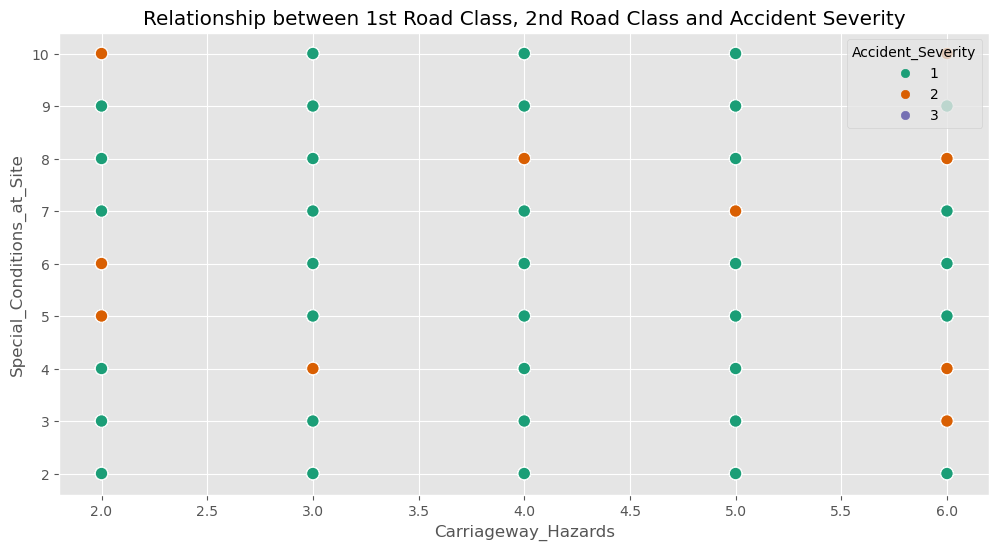

In [22]:
sns.scatterplot(x="Carriageway_Hazards",
                y="Special_Conditions_at_Site",
                hue="Accident_Severity",
                data=df_lgbm, palette="Dark2",
                s=80
                )
plt.title("Relationship between 1st Road Class, 2nd Road Class and Accident Severity")
plt.show()

In [24]:
df_lgbm.corr()

,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
Accident_Severity,1.000000,0.005508,0.001383,-0.052195,-0.028469,0.004838,0.009644,-0.122264,0.077688,-0.055715,0.029765,-0.033664,0.021847,0.022974,-0.002125,0.029880,-0.002900,0.016830,0.098226,-0.075158,-0.006306,-0.004422,0.021885,-0.013133,-0.038089,0.068980,0.081511,0.054429,0.082779,-0.009726,-0.002836,0.031552,-0.026570,0.049031,-0.001202,-0.002346,0.067079,0.029142,0.006209,-0.018795
1st_Road_Class,0.005508,1.000000,-0.210346,0.152344,0.017655,-0.023707,0.005421,-0.056419,-0.014323,0.087777,-0.020753,-0.013303,-0.057163,-0.066498,0.037260,-0.020816,0.035735,-0.084202,0.059444,0.125223,-0.004573,0.082384,-0.057930,-0.017679,-0.097297,-0.307782,0.306905,0.033522,0.135744,0.005567,0.003802,-0.009593,-0.467445,-0.144553,-0.014981,-0.005740,0.032480,-0.010173,-0.018308,-0.016594
1st_Road_Number,0.001383,-0.210346,1.000000,0.015299,0.188235,0.082453,0.001264,0.004775,-0.029195,0.003552,0.044040,-0.006243,0.012024,0.022405,-0.081028,0.043161,-0.079080,0.017875,0.008443,-0.010006,0.001384,0.037513,0.008812,0.017032,0.027839,0.055148,-0.066267,-0.004471,-0.015872,0.006298,0.006373,-0.031831,-0.201874,-0.010394,0.015199,0.007773,-0.016785,-0.023953,0.001874,0.004783
2nd_Road_Class,-0.052195,0.152344,0.015299,1.000000,0.370312,0.039887,-0.001445,0.060289,-0.387591,0.377403,-0.025004,-0.028944,-0.079915,-0.081779,0.062425,-0.025302,0.062051,-0.089256,-0.011101,0.039338,0.004947,0.155973,-0.076019,-0.041540,0.236796,-0.109992,-0.006685,-0.001084,-0.029978,-0.021248,0.005927,-0.038463,-0.127697,-0.764909,0.158030,0.032224,-0.310775,-0.041942,0.002245,0.007015
2nd_Road_Number,-0.028469,0.017655,0.188235,0.370312,1.000000,0.052846,-0.001602,0.028693,-0.249247,0.119714,0.001883,-0.018065,-0.004887,0.002549,0.014219,0.001336,0.015381,0.002054,0.000479,0.026586,0.002249,0.089899,-0.003155,-0.015309,0.097955,-0.050867,-0.056669,-0.004344,-0.045163,-0.007844,0.003909,-0.042579,-0.049865,-0.352528,0.026722,0.024779,-0.210529,-0.042737,0.007983,0.003859
Carriageway_Hazards,0.004838,-0.023707,0.082453,0.039887,0.052846,1.000000,-0.000438,0.186506,-0.111566,-0.027695,0.026640,-0.068518,-0.079645,-0.055433,0.039976,0.026307,0.040636,-0.066756,-0.012471,-0.164390,0.042093,0.378087,-0.066382,-0.118080,0.043655,-0.049053,-0.196971,-0.012599,-0.201715,-0.118765,0.158401,-0.023615,-0.059553,-0.055728,-0.010254,0.014320,-0.059022,-0.033101,0.188063,0.042975
Day_of_Week,0.009644,0.005421,0.001264,-0.001445,-0.001602,-0.000438,1.000000,-0.009895,0.006716,-0.005582,0.003871,-0.024654,0.002002,0.002320,-0.002168,0.003861,-0.002170,0.001781,0.015705,-0.004977,-0.003667,-0.000611,0.001505,-0.000843,-0.003098,0.035384,0.008241,0.003416,0.006896,0.003919,0.000350,0.001448,-0.003845,0.001349,-0.001162,-0.001730,0.006863,0.001491,0.002816,0.000520
Did_Police_Officer_Attend_Scene_of_Accident,-0.122264,-0.056419,0.004775,0.060289,0.028693,0.186506,-0.009895,1.000000,-0.056300,0.062313,-0.013906,0.042365,-0.015778,-0.013745,0.002914,-0.014110,0.003402,-0.007441,-0.108971,-0.027030,0.010001,0.007471,-0.017431,-0.079970,0.072747,-0.230902,-0.161636,-0.054058,-0.135143,-0.029335,0.000630,-0.017408,0.073180,-0.054421,0.001059,0.016649,-0.056601,-0.02179

In [27]:
df_lgbm['Carriageway_Hazards'].value_counts()

3.0    667432
4.0    297362
5.0     42226
2.0     26736
6.0      3752
Name: Carriageway_Hazards, dtype: int64

In [28]:
df_lgbm['Junction_Control'].value_counts()

3.0    499834
7.0    362029
1.0    104024
4.0     69466
5.0      1805
6.0       350
Name: Junction_Control, dtype: int64

In [29]:
df_lgbm['Junction_Detail'].value_counts()

2    424501
3    316262
1     97329
7     88547
8     36686
5     33477
9     15470
6     15283
4      9953
Name: Junction_Detail, dtype: int64

In [36]:
df_lgbm['Carriageway_Hazards'].value_counts()

3.0    667432
4.0    297362
5.0     42226
2.0     26736
6.0      3752
Name: Carriageway_Hazards, dtype: int64

In [30]:
df_lgbm['Light_Conditions'].value_counts()

5    757256
1    206698
4     60364
2      8928
3      4262
Name: Light_Conditions, dtype: int64

In [46]:
pc = df_lgbm.value_counts(["Road_Surface_Conditions", "Accident_Severity"])
pc

Road_Surface_Conditions  Accident_Severity
1                        1                    599830
2                        1                    257582
1                        2                     95394
2                        2                     38027
3                        1                     20833
1                        3                      9612
4                        1                      6627
2                        3                      4484
3                        2                      2647
5                        1                      1211
4                        2                       725
3                        3                       247
5                        2                       201
4                        3                        53
5                        3                        35
dtype: int64

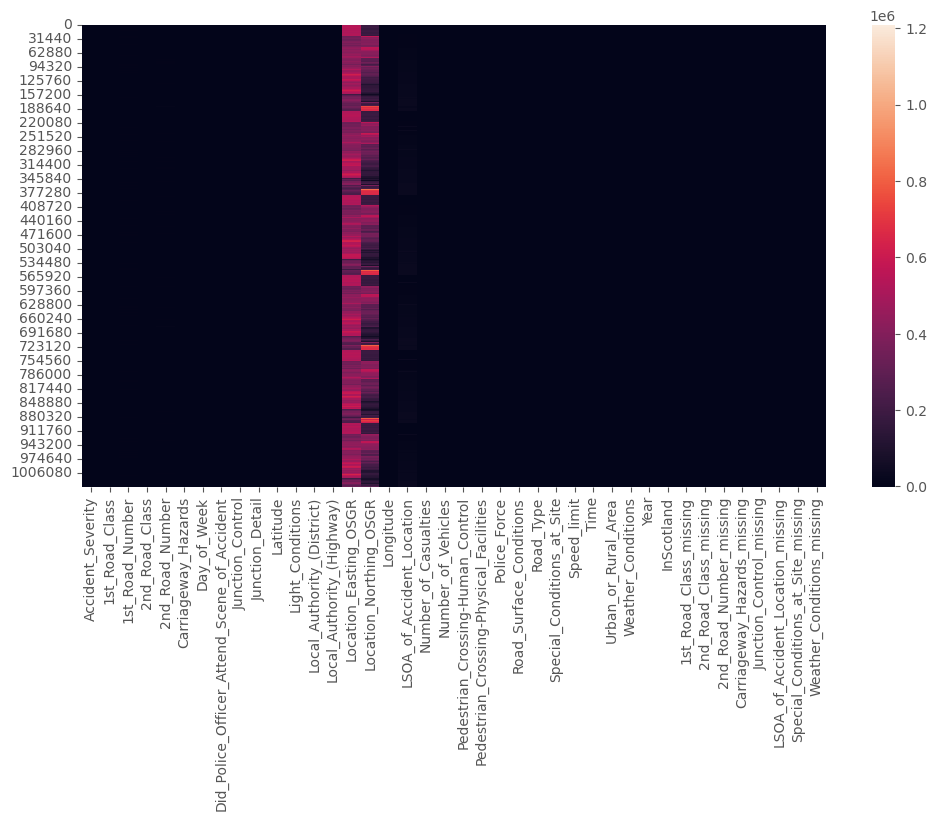

In [25]:
df1 = df_lgbm.drop(['Accident_Index'], axis=1)
sns.heatmap(df1)
plt.show()

####  2.2.2 Numerical  
Let’s take a look at the numerical features.  
Let’s investigate how many unique values each of these feature has.  
This process will give us some insights about the number of features in the dataset:  
- **binary** (2 unique values)  
- **ordinal** (3 to ~10 unique values)  
- **continuous** (more than 10 unique values)

Weather_Conditions_missing                          2
LSOA_of_Accident_Location_missing                   2
Junction_Control_missing                            2
Carriageway_Hazards_missing                         2
2nd_Road_Number_missing                             2
2nd_Road_Class_missing                              2
1st_Road_Class_missing                              2
InScotland                                          2
Urban_or_Rural_Area                                 2
Special_Conditions_at_Site_missing                  2
Pedestrian_Crossing-Human_Control                   3
Accident_Severity                                   3
Did_Police_Officer_Attend_Scene_of_Accident         3
Time                                                4
1st_Road_Class                                      5
2nd_Road_Class                                      5
Carriageway_Hazards                                 5
Road_Surface_Conditions                             5
Road_Type                   

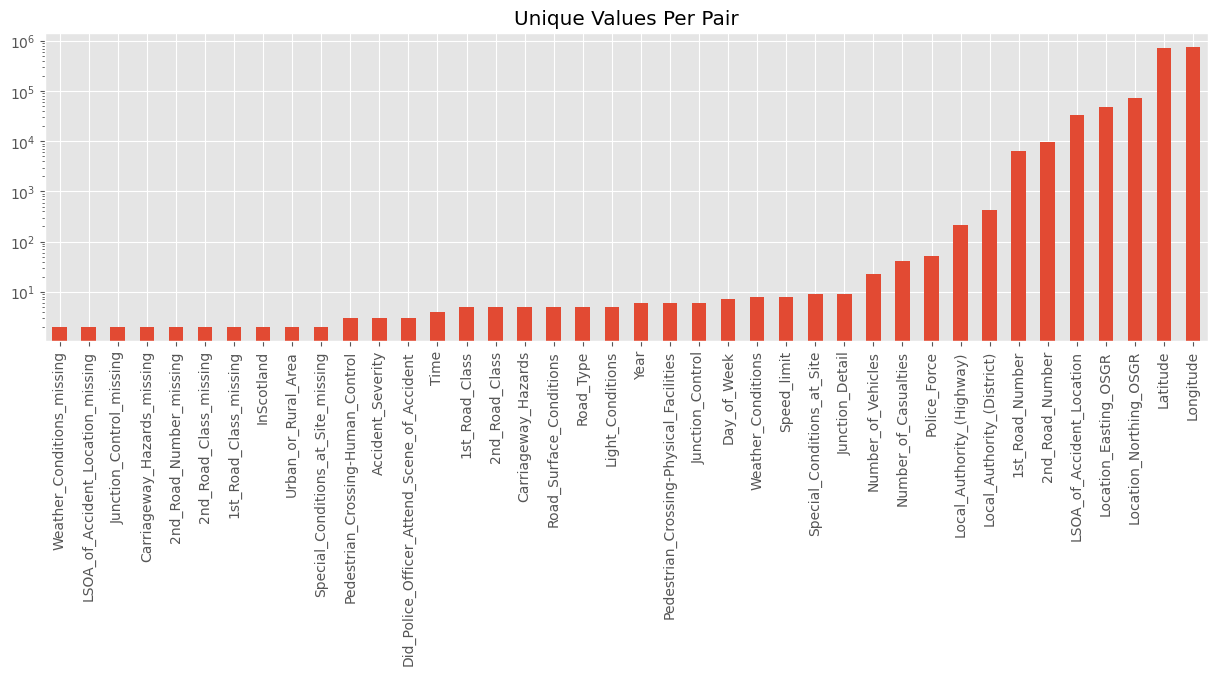

In [26]:
#  For each numerical feature compute number of unique entries
unique_values = df_lgbm.select_dtypes(
                                     include='number'
                                     ).nunique().sort_values()

print(unique_values)

#  Plot information with y-axis in log-scale
unique_values.plot.bar(
                       logy=True,
                       figsize=(15, 4),
                       title='Unique Values Per Pair'
                       );

For an alternative way to get the information you could also use `df_acc.info()` or `df_acc.describe()`.

In [31]:
df_lgbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037508 entries, 0 to 1037507
Data columns (total 41 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1037508 non-null  object 
 1   Accident_Severity                            1037508 non-null  int64  
 2   1st_Road_Class                               1037508 non-null  float64
 3   1st_Road_Number                              1037508 non-null  float64
 4   2nd_Road_Class                               1037508 non-null  float64
 5   2nd_Road_Number                              1037508 non-null  float64
 6   Carriageway_Hazards                          1037508 non-null  float64
 7   Day_of_Week                                  1037508 non-null  int64  
 8   Did_Police_Officer_Attend_Scene_of_Accident  1037508 non-null  float64
 9   Junction_Control                             1

In [32]:
df_lgbm.describe()

,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
count,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06,1.037508e+06
mean,1.159860e+00,2.904169e+00,1.013593e+03,1.463610e+00,3.913629e+02,3.353090e+00,4.009791e+00,1.195872e+00,4.266683e+00,3.129189e+00,5.257289e+01,4.110885e+00,1.847573e+02,9.548161e+01,4.383549e+05,2.983028e+05,-1.453784e+00,1.630088e+04,1.361350e+00,1.836534e+00,9.269326e-03,6.788622e-01,2.058538e+01,1.361973e+00,2.032988e+00,3.757264e+00,3.948328e+01,1.625559e+00,1.364130e+00,1.365383e+00,2.007335e+03,1.059566e+00,2.900585e-01,8.115725e-01,1.027173e-02,9.812426e-01,3.372041e-01,6.820381e-02,9.742624e-01,1.841046e-02
std,4.026456e-01,1.236432e+00,1.832806e+03,1.043125e+00,1.321138e+03,6.189134e-01,2.067089e+00,4.023556e-01,2.111060e+00,1.955826e+00,1.423377e+00,1.596604e+00,1.235011e+02,5.035575e+01,9.471101e+04,1.580555e+05,1.390700e+00,9.520203e+03,8.236864e-01,7.187030e-01,1.265435e-01,1.749168e+00,1.442102e+01,5.798684e-01,7.297930e-01,1.195447e+00,1.432817e+01,8.514694e-01,4.811856e-01,1.005625e+00,1.689276e+00,2.366807e-01,4.537893e-01,3.910533e-01,1.008277e-01,1.356673e-01,4.727555e-01,2.520954e-01,1.583516e-01,1.344304e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-9.661628e+02,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.991443e+01,1.000000e+00,1.000000e+00,1.000000e+00,6.495000e+04,1.052000e+04,-7.516225e+00,-2.020000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.005000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,5.149223e+01,4.000000e+00,7.400000e+01,5.600000e+01,3.754000e+05,1.784475e+05,-2.368467e+00,8.004750e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.006000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,1.000000e+00,2.000000e+00,1.270000e+02,1.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,5.234501e+01,5.000000e+00,1.680000e+02,1.000000e+02,4.376300e+05,2.731200e+05,-1.436562e+00,1.654700e+04,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.007000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.000000e+00,4

##  3.  Quality Investigation  
Now we have an understanding of our data structure we can move on to our quality check.  
  
It is not uncommon for us to revisit our data structure and make changes or improvements.  
###  3.1 Duplicates

### 3.2 Missing values  
Here we investigate missing values, having some missing values is normal.  
What we want to identify at this stage are big holes in the dataset, i.e. samples or features with a lot of missing values.

#### 3.2.2 Per sample
To look at number of missing values per sample we have multiple options.  
A straight forward one is to simply visualize the output of `df_acc.isna()`:

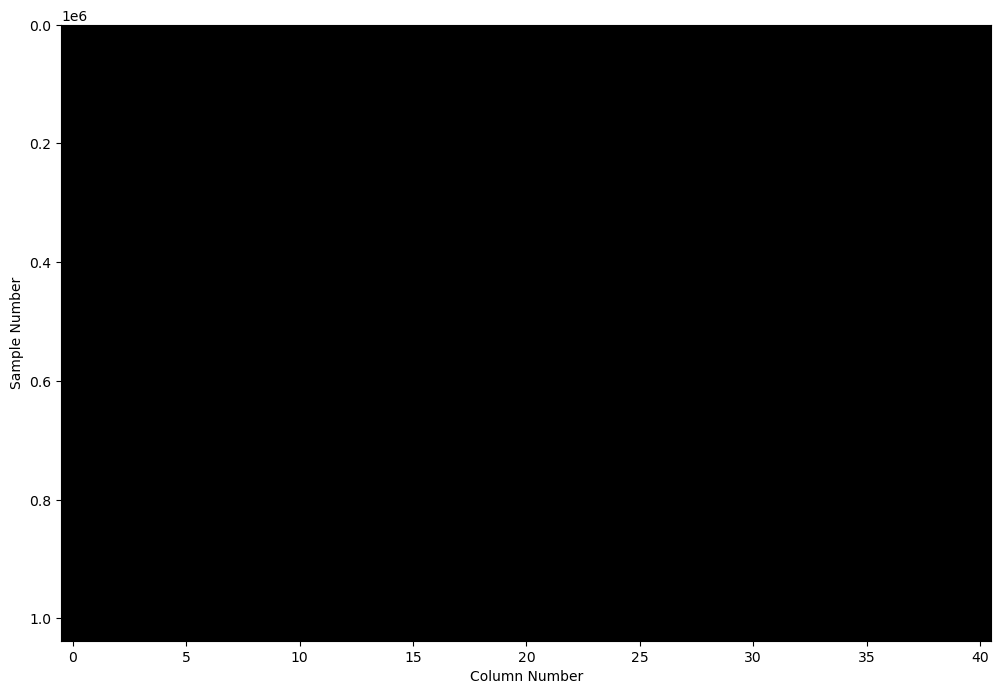

In [33]:
plt.figure(figsize=(12, 8))
plt.imshow(df_lgbm.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

This figure shows on the y-axis each of the 1,048,575 individual samples, and on the x-axis if any of the 34 features contains a missing value.  
While this is already a useful plot, an even better approach is to use the **missingno** library, to get a plot like this one:

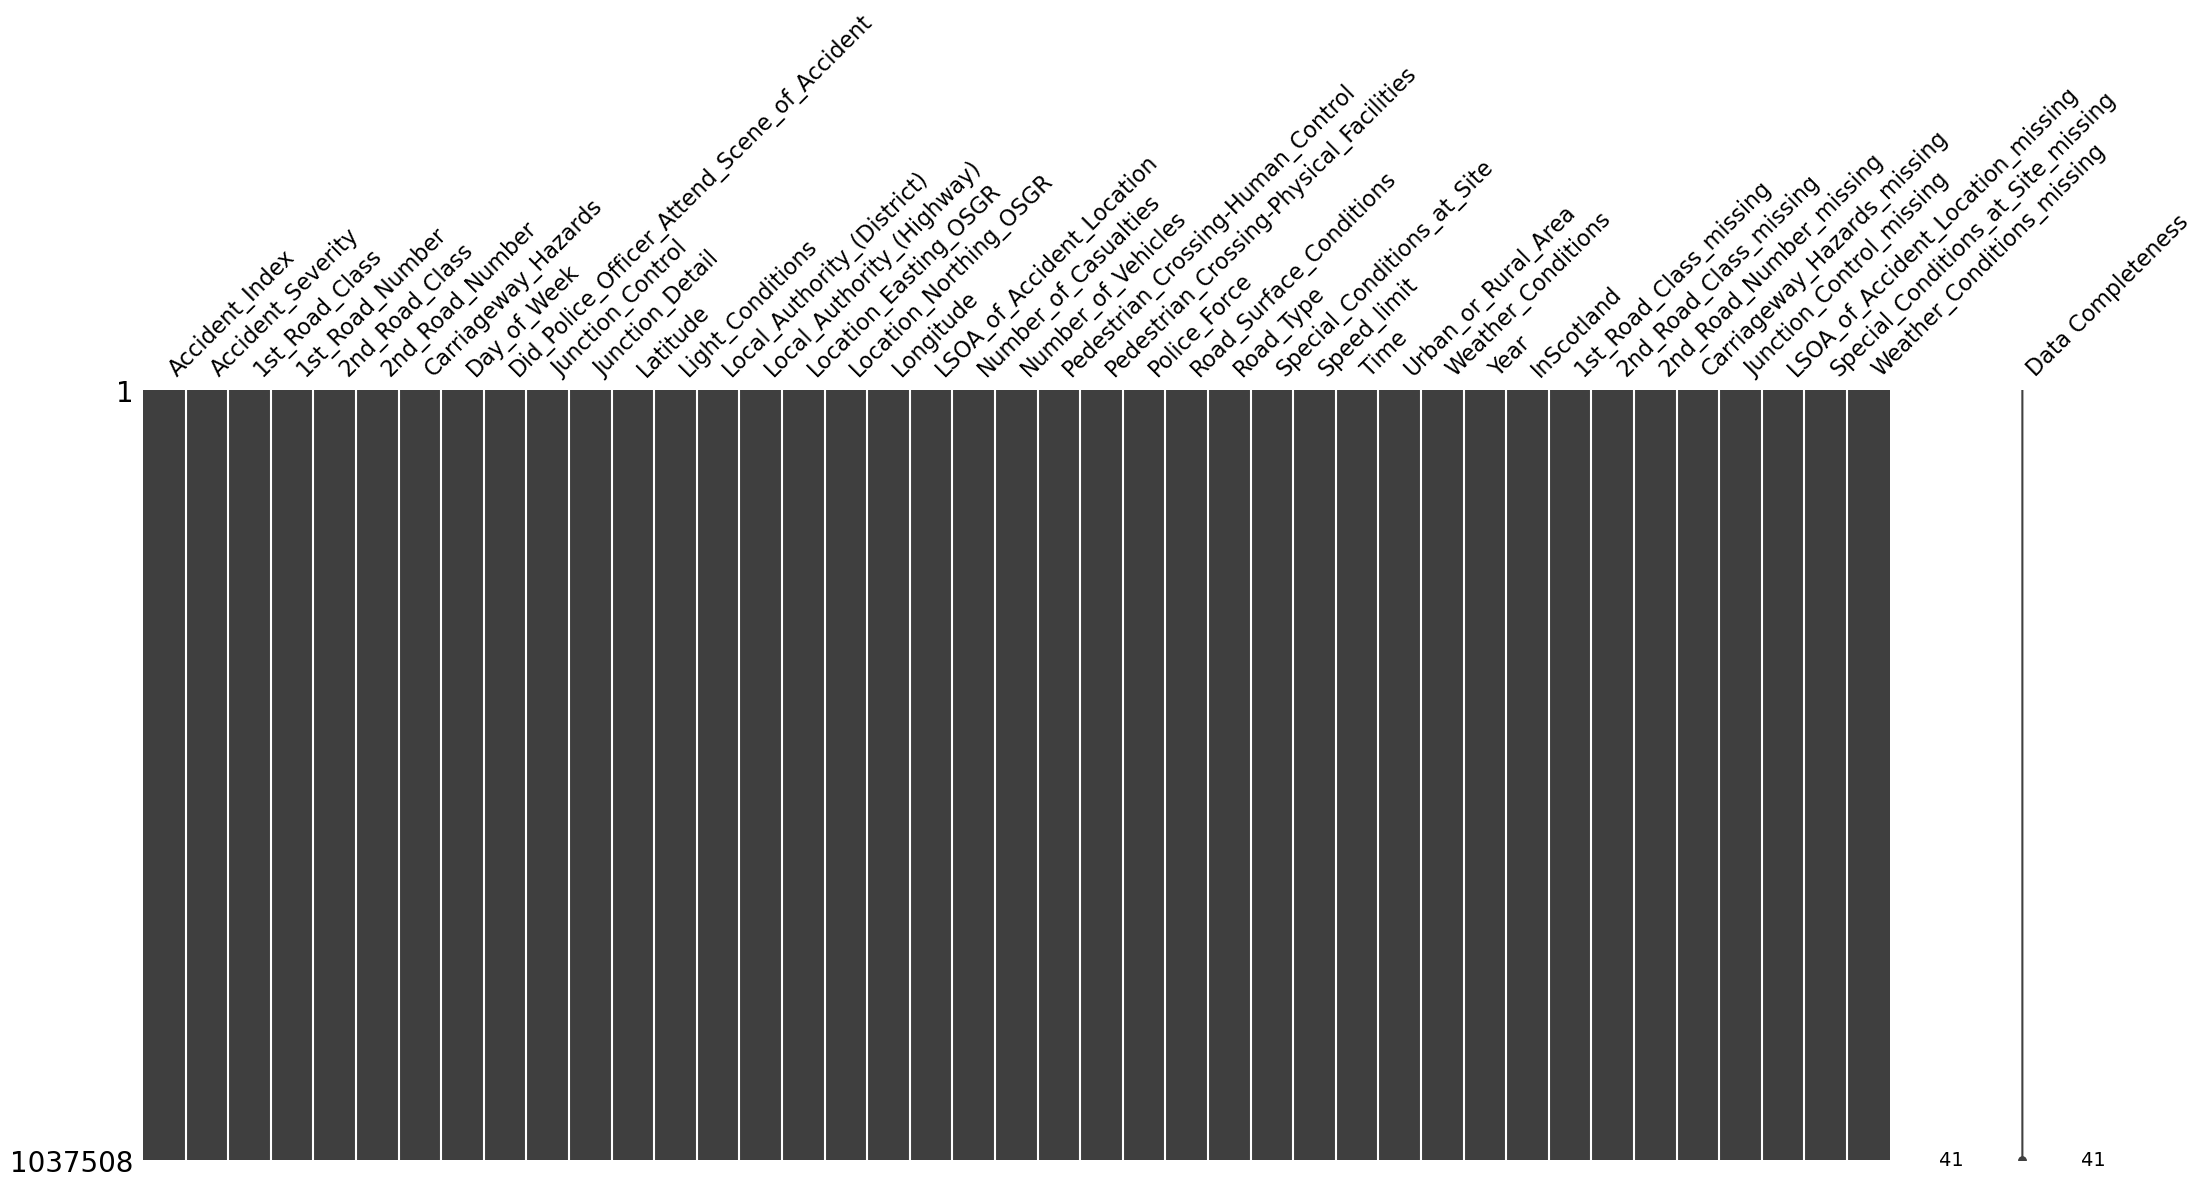

In [34]:
msno.matrix(df_lgbm, labels=True, sort="descending");

In [35]:
df_lgbm = df_lgbm.dropna(thresh=l.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_lgbm.shape

NameError: name 'df_acc' is not defined

#### 3.2.3 Per Feature  
Let’s now look at the number of missing values per feature.  
For this we can use pandas to quickly identify the ratio of missing values per feature.

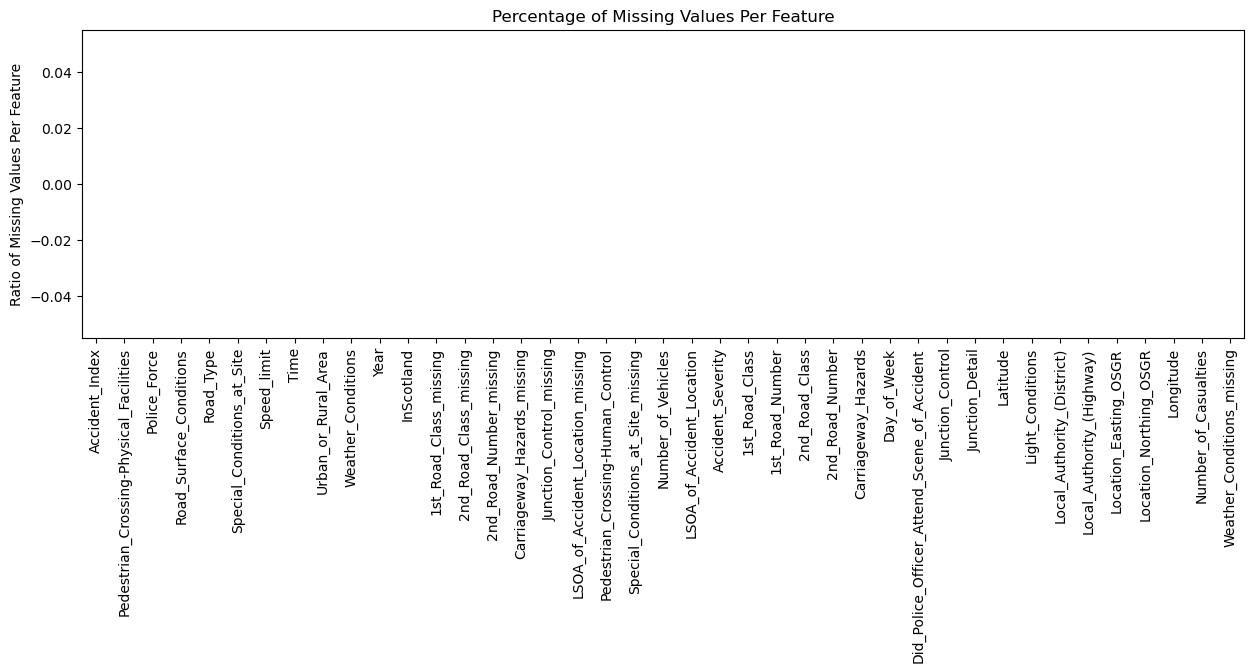

In [37]:
df_lgbm.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of Missing Values Per Feature",
    ylabel="Ratio of Missing Values Per Feature");

From this figure we can see that most features don’t contain any missing values.  
Nonetheless, features like 2nd_Road_Class, 1st_Road_Class, and LSOA_of_Accident_Location still contain quite a lot of missing values.  

### 3.3 Numerical features  
  
To plot this global view of the dataset, at least for the numerical features, you can use pandas’ `.plot()` function and combine it with the following parameters:

- `lw=0`: lw stands for line width. **0** means that we don’t want to show any lines
- `marker="."`: Instead of lines, we tell the plot to use **.** as markers for each data point
- `subplots=True`: subplots tells pandas to plot each feature in a separate subplot
-`layout=(-1, 4)`: This parameter tells pandas how many rows and columns to use for the subplots. The **-1** means “as many as needed”, while the **3** means to use 3 columns per row.
- `figsize=(15, 30)`, `markersize=1`: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.

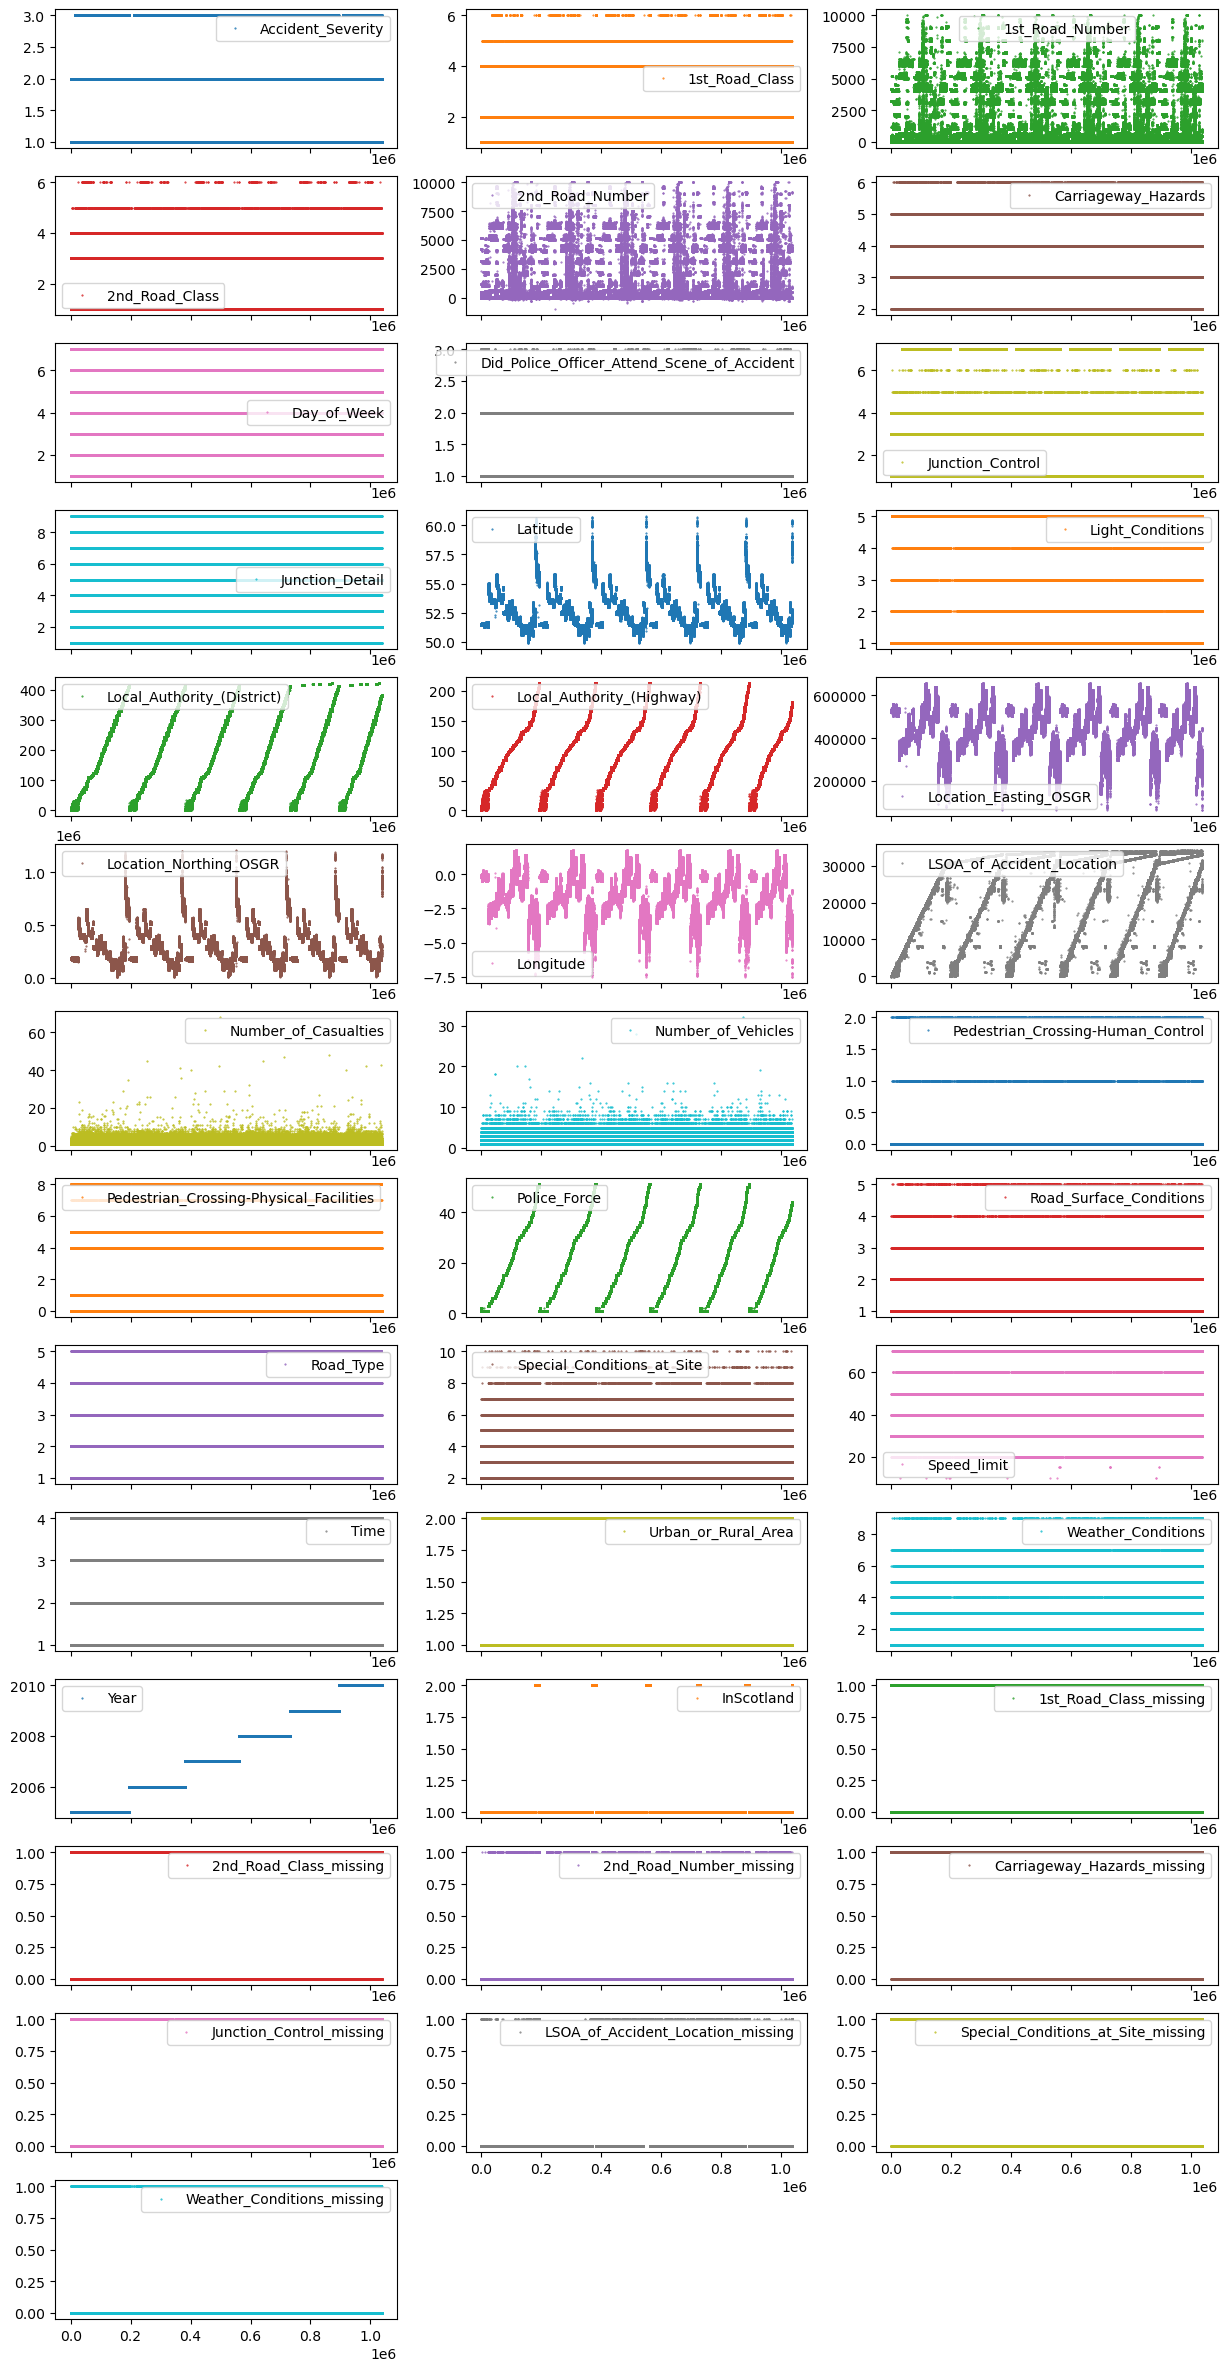

In [38]:
df_lgbm.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
            figsize=(15, 30), markersize=1
            );

Each point in this figure is a sample (i.e. a row) in our dataset.  
Each subplot represents a different feature.  
- The y-axis shows the feature value
- The x-axis is the sample index
  
This kind of plot can give lots of ideas for data cleaning and EDA.  
You should invest as much time as needed until your happy with the output of this visualization.

### 3.4 Non-numerical features
Identifying unwanted entries or recording errors on non-numerical features is a bit more tricky.  
Given that at this point, we only want to investigate the general quality of the dataset.  
So what we can do is take a general look at how many unique values each of these non-numerical features contain, and how often their most frequent category is represented.

In [31]:
# Extract descriptive properties of non-numerical features
df_acc.describe(exclude=["number", "datetime"])

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),LSOA_of_Accident_Location,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
count,1048489,742939,608739,1048489,1048465,1048489,1048489,1048489,1048489,1046405,1048489,1048489,976680,1048489,1047306,1041231,1048478,1048390,1048471,1027107,1048481
unique,671290,5,6,3,6,2191,7,7,10,5,422,212,34226,51,5,5,10,1439,3,8,2
top,2.00513E+12,A,Unclassified,Slight,None,21/10/2005,Friday,Give way or uncontrolled,Not at junction or within 20 metres,Daylight,Birmingham,Kent,E01000004,Metropolitan Police,Dry,Single carriageway,None,17:00,Urban,Fine no high winds,No
freq,7277,470821,411055,895810,1028755,822,171890,502976,429361,763972,21384,27743,1733,143507,712315,780594,1021458,10034,667877,831023,985820


There are multiple ways we could potentially streamline the quality investigation for each individual non-numerical feature.  
None of them are perfect, and all of them will require some follow up investigation.  
What we could do is loop through all non-numerical features and plot for each of them the number of occurrences per unique value.

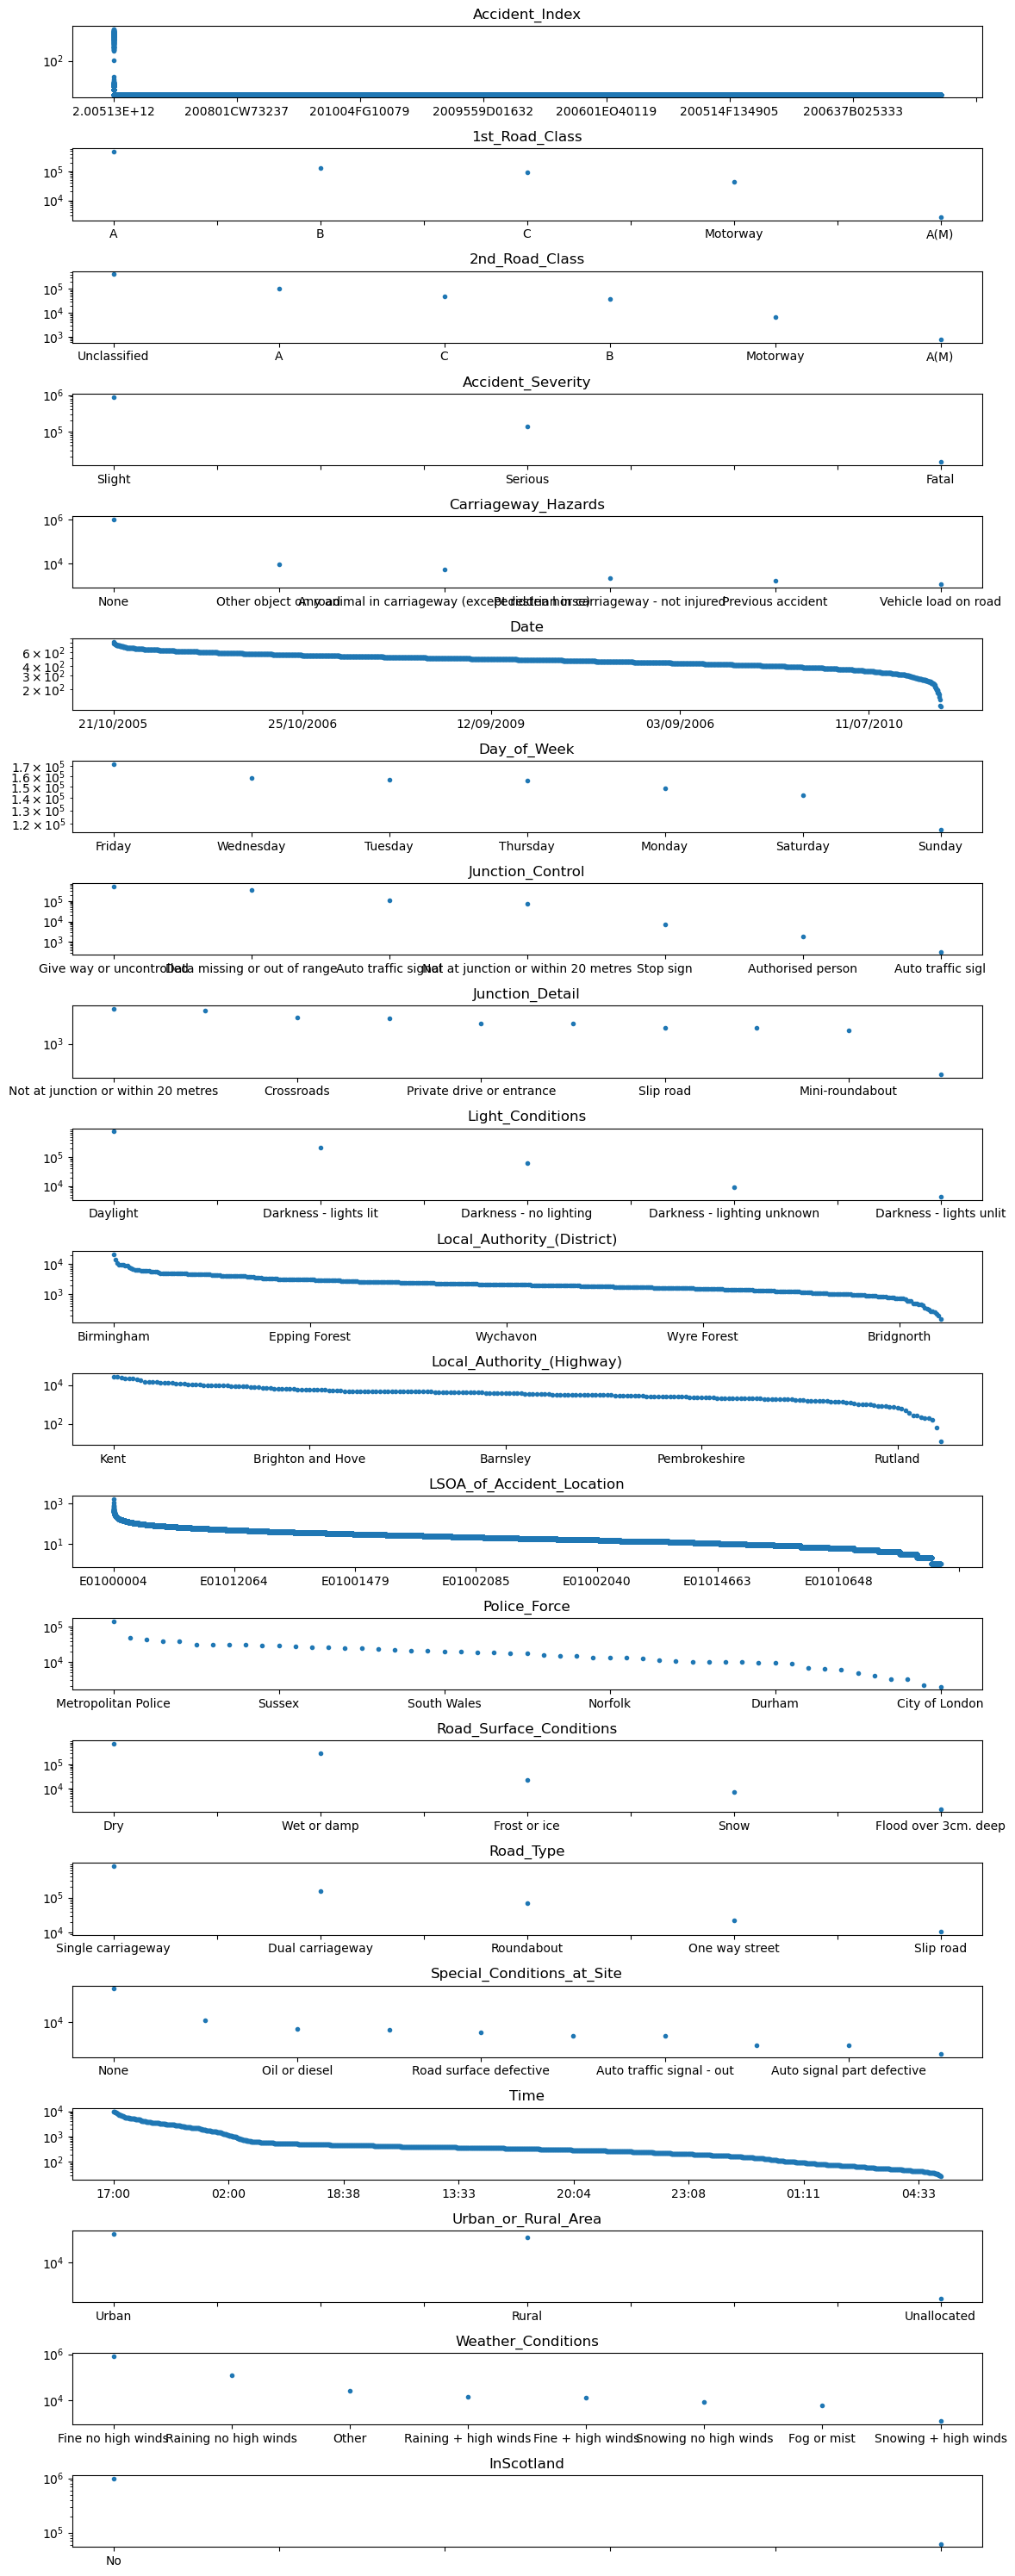

In [41]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=21, figsize=(12, 30))

# Identify non-numerical features
df_non_numerical = df_acc.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)

plt.tight_layout();

We can see that the most frequent accident (i.e. Accident_Index), had more than 100 people involved. Digging a bit deeper (i.e. looking at the individual features of this accident), we could identify that this accident happened on February 24th, 2015 at 11:55 in Cardiff UK. A quick internet search reveals that this entry corresponds to a luckily non-lethal accident including a minibus full of pensioners.

The decision for what should be done with such rather unique entries is once more left in the the subjective hands of the person analyzing the dataset. Without any good justification for WHY, and only with the intention to show you the HOW - let’s go ahead and remove the 10 most frequent accidents from this dataset.

In [53]:
df3 = df_acc.sort_values(by=['Number_of_Casualties'], ascending=False)
df3.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
505809,200743N002017,Motorway,4.0,Motorway,4.0,Fatal,None,03/01/2007,Wednesday,1.0,Give way or uncontrolled,Slip road,51.497547,Darkness - lights lit,South Bucks,Buckinghamshire,504450.0,178700.0,-0.496697,E01017829,68,1,0.0,0.0,Thames Valley,Wet or damp,Slip road,None,70,23:44,Rural,Raining no high winds,2007,No
645849,2.00822E+12,C,65.0,None,0.0,Fatal,None,18/08/2008,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,52.981128,Daylight,Staffordshire Moorlands,Staffordshire,407150.0,342650.0,-1.894963,E01029761,62,2,0.0,0.0,Staffordshire,Wet or damp,Single carriageway,None,30,17:55,Rural,Fine no high winds,2008,No
872301,200950AH2T013,C,99.0,None,0.0,Fatal,None,22/12/2009,Tuesday,1.0,Not at junction or within 20 metres,Not at junction or within 20 metres,50.143676,Darkness - no lighting,Cornwall,Cornwall,159430.0,32510.0,-5.368501,E01018864,48,1,0.0,0.0,Devon and Cornwall,Frost or ice,Single carriageway,None,60,22:10,Rural,Other,2009,No
721766,2.00861E+12,A,55.0,None,0.0,Slight,None,17/07/2008,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,53.279078,Daylight,Conwy,Conwy,273200.0,377480.0,-3.903259,W01000125,47,3,0.0,0.0,North Wales,Wet or damp,Dual carriageway,Roadworks,70,10:15,Rural,Raining no high winds,2008,No
650702,2.00823E+12,Motorway,42.0,None,0.0,Serious,None,26/09/2008,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,52.347806,Daylight,Stratford-upon-Avon,Warwickshire,411700.0,272210.0,-1.829674,E01031243,45,3,0.0,0.0,Warwickshire,Dry,Dual carriageway,None,70,14:05,Rural,Fine no high winds,2008,No


In [54]:
print(df_acc['Number_of_Casualties'].corr(df_acc['Accident_Severity']))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [66]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
df_acc = df_acc[~df_acc["Accident_Index"].isin(accident_ids)]
df_acc.shape

(986619, 34)

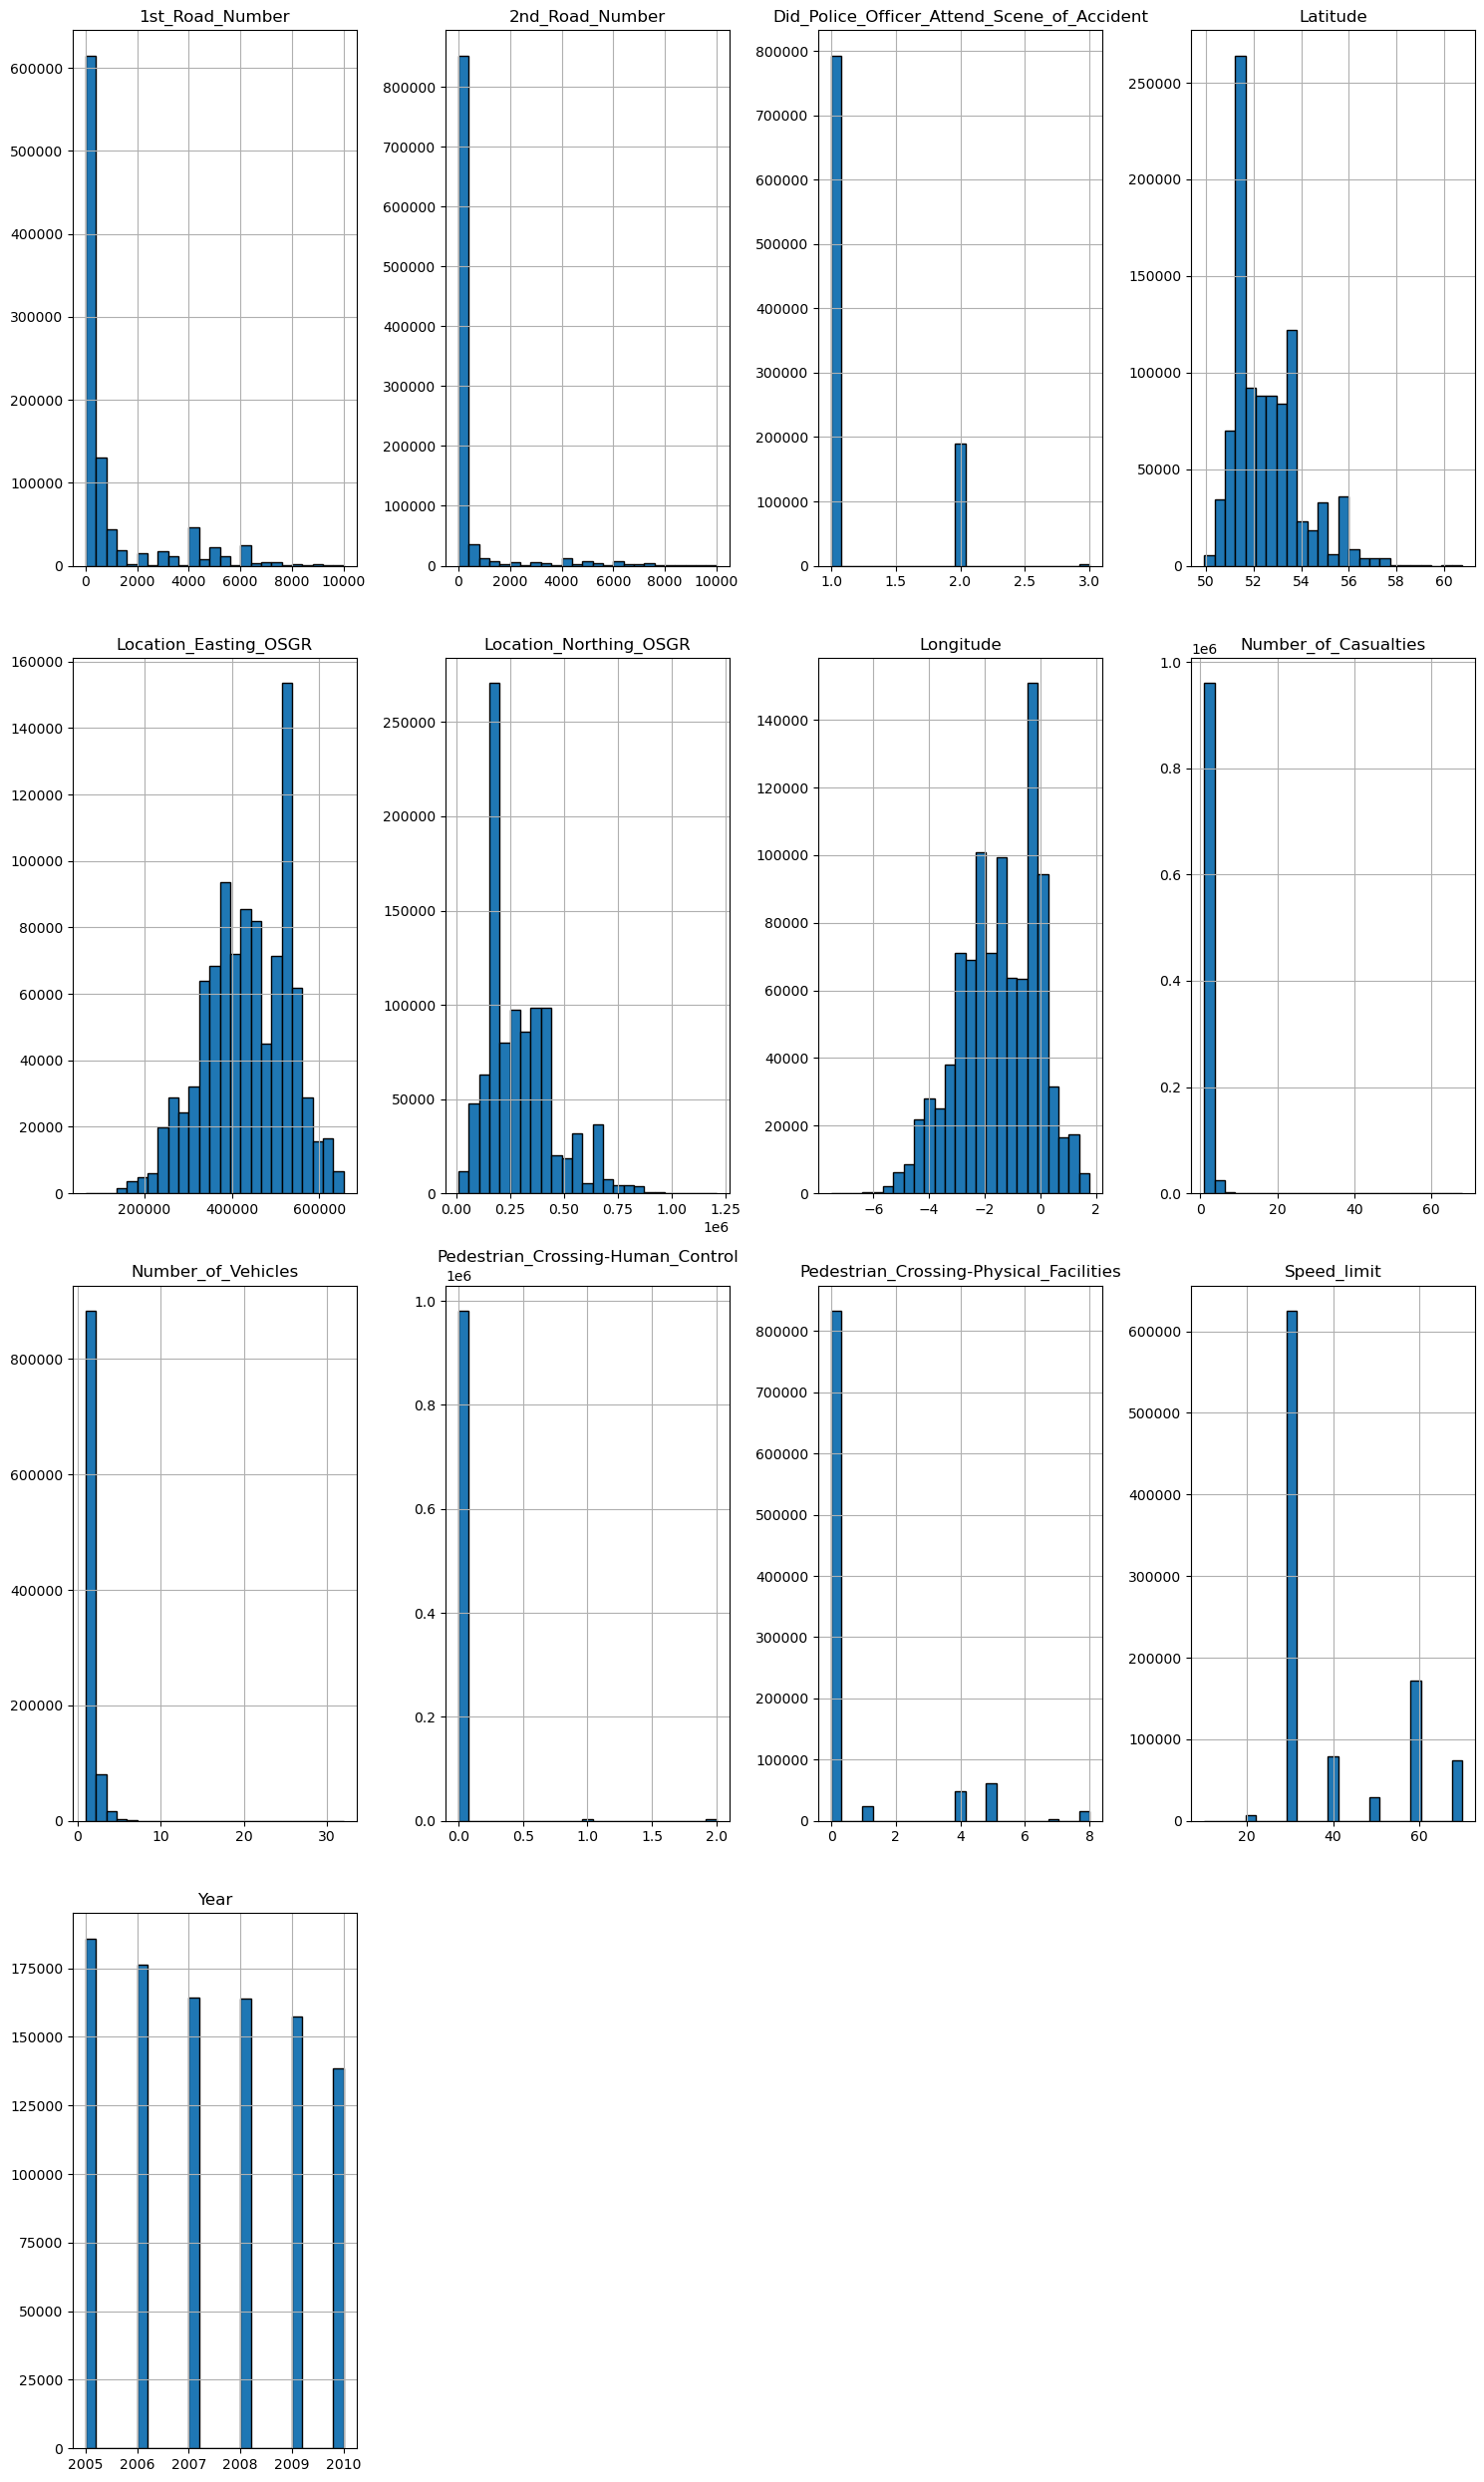

In [87]:
# Plots the histogram for each numerical feature in a separate subplot
df_acc.hist(bins=25, figsize=(15, 25), layout=(-1, 4), edgecolor="black")
plt.tight_layout();

Pedestrian_Crossing-Human_Control    0.994265
Carriageway_Hazards                  0.981246
Special_Conditions_at_Site           0.974336
InScotland                           0.936481
Accident_Severity                    0.854108
dtype: float64

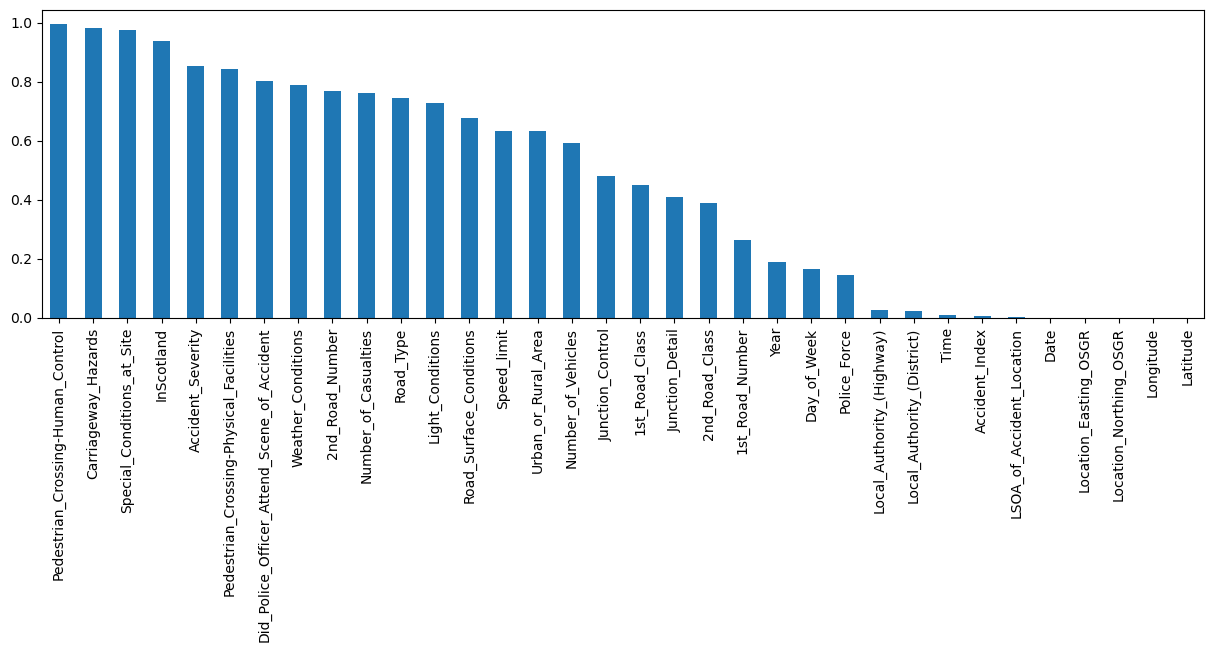

In [68]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_acc.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_acc.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

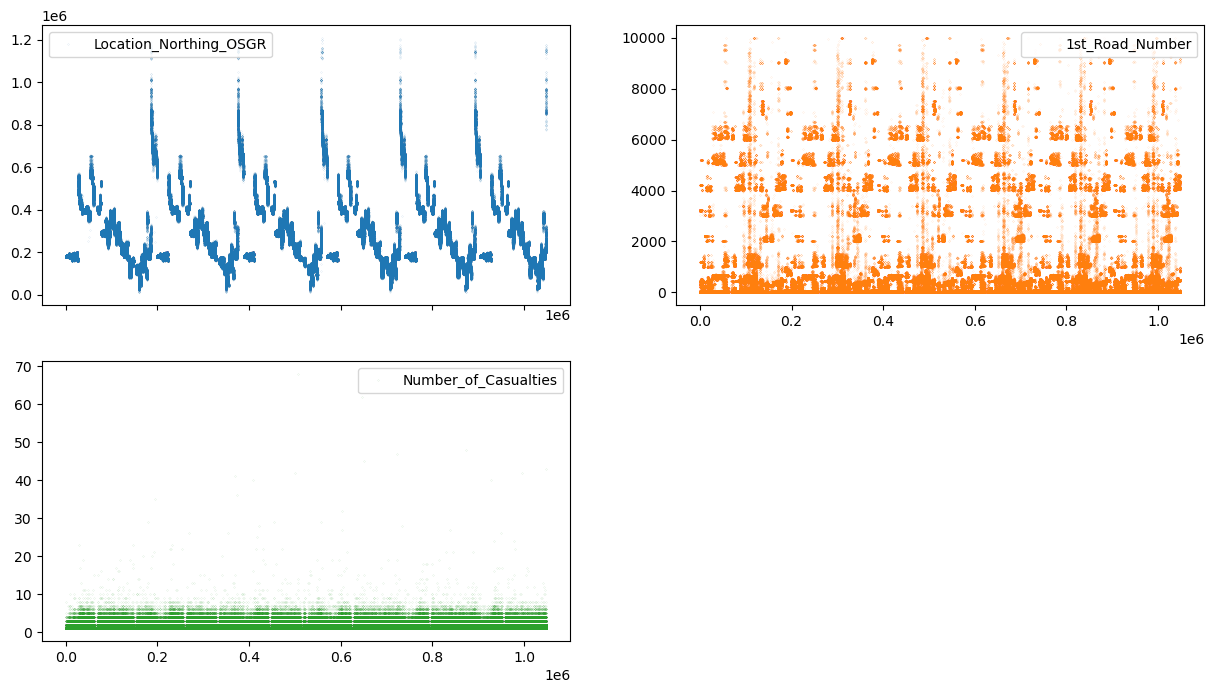

In [85]:
df_acc[["Location_Northing_OSGR",
        "1st_Road_Number",
        "InScotland",
        "Number_of_Casualties"]].plot(
                                      lw=0, marker=".",
                                      subplots=True,
                                      layout=(-1, 2),
                                      markersize=0.1,
                                      figsize=(15, 8)
                                      );

In [72]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_acc.select_dtypes(include="number").nunique() >= 25

In [74]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_acc[cols_continuous[cols_continuous].index]
df_continuous.shape

(986619, 7)

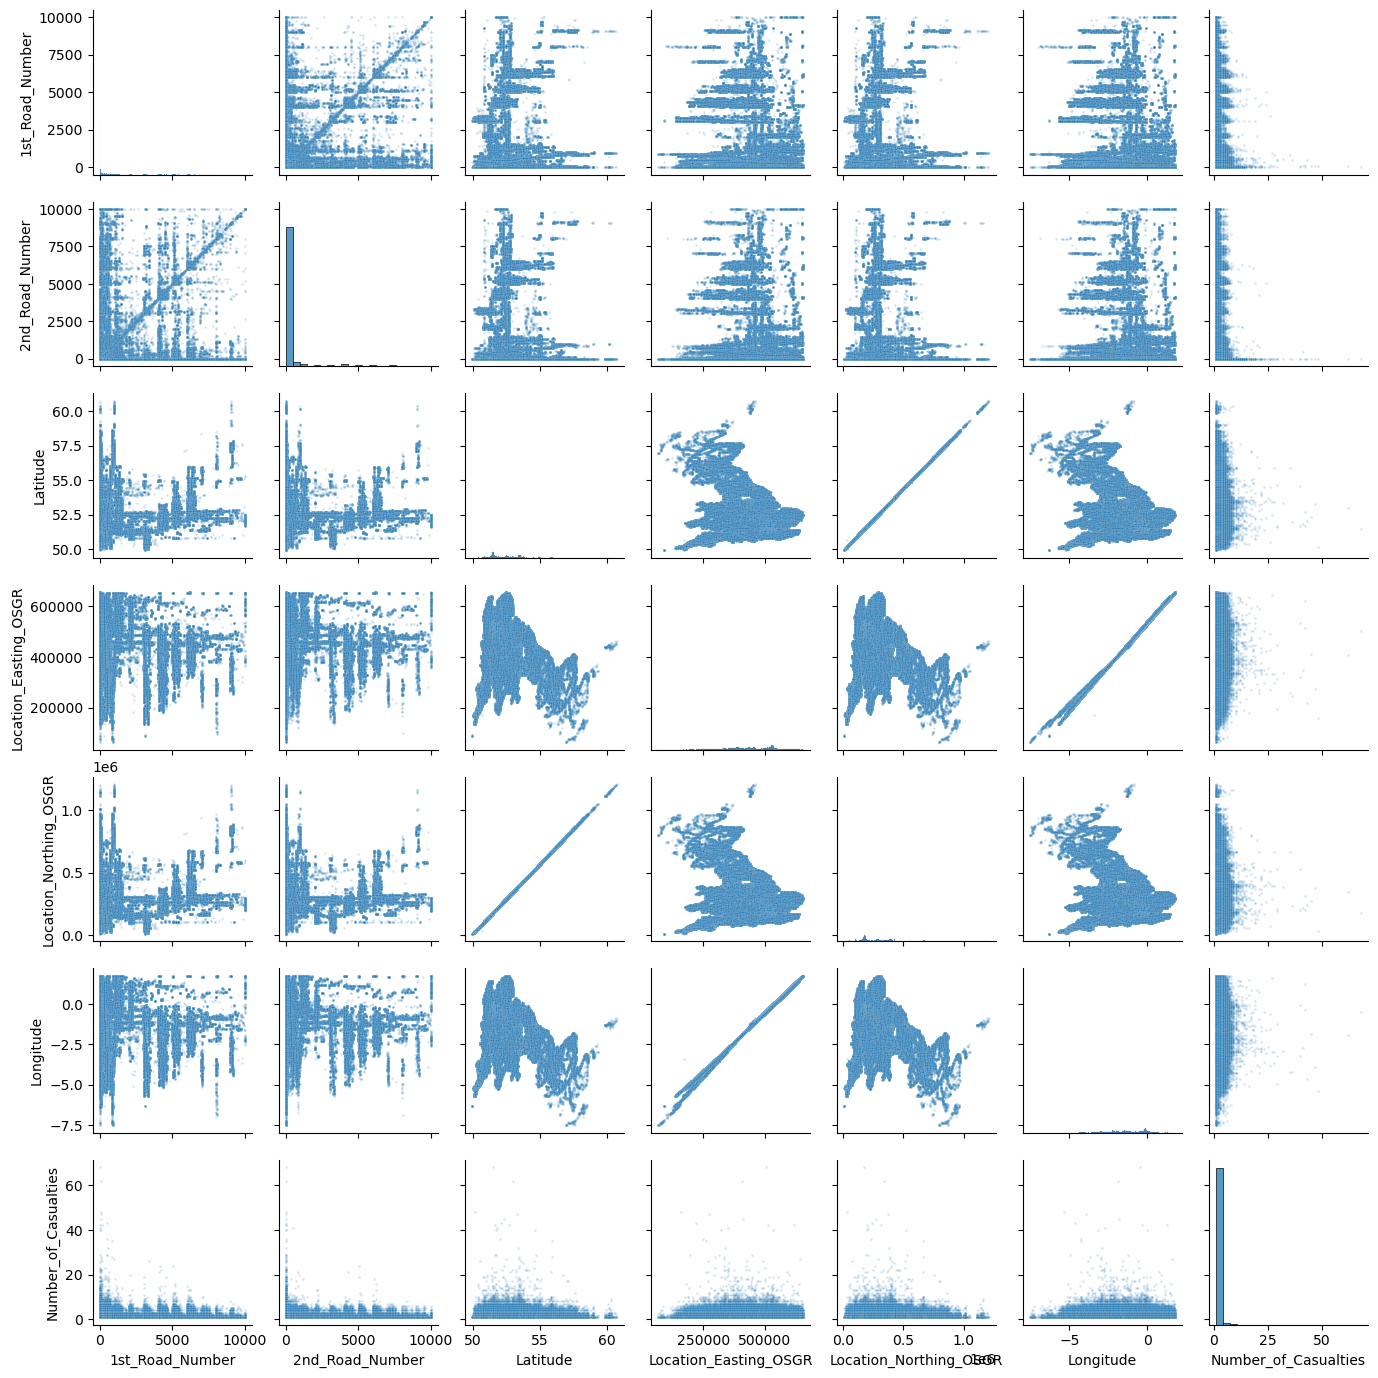

In [78]:
sns.pairplot(df_continuous, height=2, plot_kws={"s": 3, "alpha": 0.2});

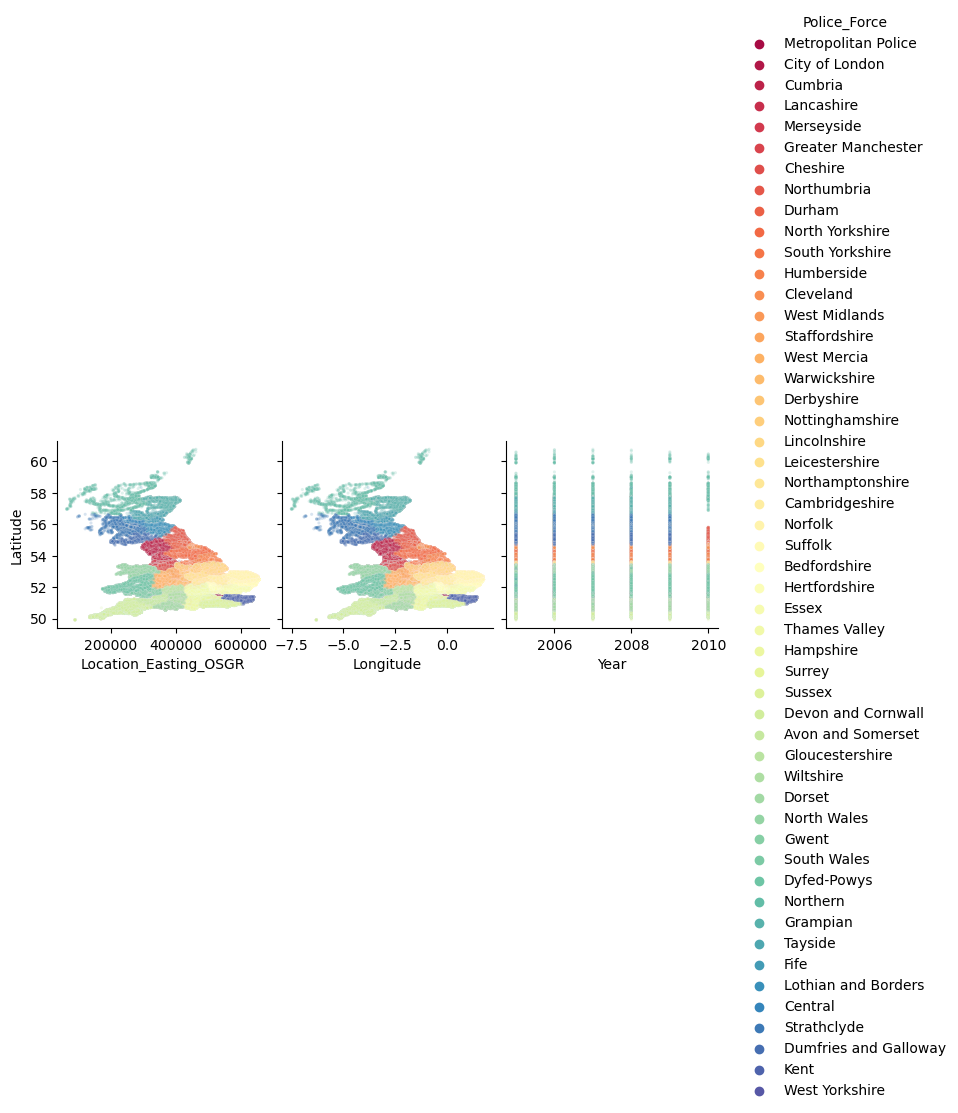

In [86]:
sns.pairplot(
    df_acc, plot_kws={"s": 5, "alpha": 0.2}, hue="Police_Force", palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Longitude", "Year"],
    y_vars="Latitude");

In [47]:
dups = df_acc[df_acc.drop(labels=["Accident_Index"], axis=1).duplicated()]
dups.head(30)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
58964,2.00512E+12,None,0.0,A,64.0,Slight,None,04/02/2005,Friday,1.0,Give way or uncontrolled,T or staggered junction,54.275973,Daylight,Scarborough,North Yorkshire,503250.0,487860.0,-0.415801,E01027826,1,2,0.0,0.0,North Yorkshire,Wet or damp,Single carriageway,None,30,13:40,Urban,Fine no high winds,2005,No
148119,2.00546E+12,None,0.0,None,0.0,Slight,None,18/05/2005,Wednesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.381965,Daylight,Medway,Medway,577820.0,167870.0,0.553941,E01016046,1,2,0.0,0.0,Kent,Dry,Single carriageway,None,30,16:10,Urban,Fine no high winds,2005,No
151435,2.00546E+12,A,20.0,None,0.0,Slight,None,19/05/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.107403,Daylight,Dover,Kent,628620.0,139310.0,1.264598,E01024249,2,4,0.0,0.0,Kent,Wet or damp,Dual carriageway,None,70,18:15,Rural,Fog or mist,2005,No
188301,2005930DUP371,A,972.0,None,0.0,Slight,None,31/12/2005,Saturday,1.0,Data missing or out of range,Not at junction or within 20 metres,56.476236,Daylight,Dundee City,Dundee City,342820.0,731950.0,-2.929861,None,1,1,0.0,0.0,Tayside,Wet or damp,None,None,30,12:00,Urban,Raining no high winds,2005,Yes
274664,200620F183201,A,4400.0,None,0.0,Slight,None,31/08/2006,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,52.485166,Daylight,Birmingham,Birmingham,406980.0,287480.0,-1.898651,E01009191,1,2,0.0,0.0,West Midlands,Wet or damp,Dual carriageway,None,30,07:00,Urban,Other,2006,No
301445,200634NC01168,C,8.0,None,0.0,Slight,None,02/03/2006,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,52.406711,Daylight,Kettering,Northamptonshire,493220.0,279630.0,-0.631071,E01027090,1,1,0.0,0.0,Northamptonshire,Frost or ice,Single carriageway,None,60,08:55,Rural,Fine no high winds,2006,No
386396,200697QC01007,B,769.0,None,0.0,Slight,None,06/07/2006,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,55.804935,Daylight,East Renfrewshire,East Renfrewshire,254740.0,659280.0,-4.319199,None,1,3,0.0,0.0,Strathclyde,Dry,Single carriageway,None,30,13:00,Urban,Fine no high winds,2006,Yes
387033,200697UC03805,A,736.0,None,0.0,Slight,None,16/05/2006,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,55.747521,Daylight,East Ayrshire,East Ayrshire,241710.0,653340.0,-4.523427,None,1,1,0.0,0.0,Strathclyde,Wet or damp,Single carriageway,Oil or diesel,60,07:55,Rural,Raining no high winds,2006,Yes
428411,200706PQ66105,A,669.0,Unclassified,0.0,Slight,None,01/02/2007,Thursday,2.0,Give way or uncontrolled,T or staggered junction,53.550845,Darkness - lights lit,Rochdale,Rochdale,388010.0,406040.0,-2.182447,E01005540,1,2,0.0,0.0,Greater Manchester,Dry,Dual carriageway,None,30,05:45,Urban,Fine no high winds,2007,No
599644,200804TA08231,Motorway,65.0,None,0.0,Slight,None,02/10/2008,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,53.763531,Daylight,Hyndburn,Lancashire,373950.0,429760.0,-2.396654,E01025074,1,1,0.0,0.0,Lancashire,Frost or ice,Dual carriageway,None,70,11:36,Rural,Other,2008,No


In [14]:
df_veh = pd.read_parquet('../../Omdena_Predicting_RTC/DATA/parquet/vehicle_data.parquet')
df_veh.head(2)

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
